## Lab 4 - MNIST

For lab 4, you will complete and submit this ipynb to Canvas by the deadline.

Please see the posted Fashion-MNIST Jupyter Notebook. You should use it as the guideline to complete this Jupyter Notebook. There are many similarities, except a few places that you need to make modifications.

You will import the required modules, download the training/test data, use the dataloader, train the model (aim for at least 70% accuracy), and then use the model to test a few handwritten digits from the test dataset.

Every cell in this file must correspond to the similar cell in the same order in the fashion-MNIST file provided above. There is one optional cell at the every end, in case you would like to use it for more visualization, testing ... 

Add a comment to every line of code, and code segment (e.g. cell, branching, repetition, function, ...) of your code. Please refer to the pytorch documentation. This is meant to demonstrate some reasonable understanding of what is happing in the code.


In [2]:
# All the needed imports
import torch  #imports torch to allow us to use pytorch
from torch import nn  #imports neural networks for torch
from torch.utils.data import DataLoader  #from the python iterable torch.utils.data, import DataLoader, one of the two Pytorch primitives to work with data 
from torchvision import datasets  #import the actual dataset that we are going to be working with
from torchvision.transforms import ToTensor, Lambda, Compose  #imports transformations for datasets, ToTensor: allows tensor on objects, Lambda: applies a user-defined lambda as a transform, Compose: allows to chain together multiple transformations
import matplotlib.pyplot as plt  #imports the matplotlib.pyplot library for plotting data, imports it as plt (for code usage)

In [3]:
# Download training data from open datasets.
training_data = datasets.MNIST(  #initialize constructor, name the dataset object from the dataset abstract class training_data for data training
    root="data",  #Set the root directory of dataset where MNIST/processed/training.pt and MNIST/processed/test.pt exist.
    train=True,  #sets train to true to indicate its for data training, creates dataset from training.pt
    download=True,  #downloads the dataset to the root directory.
    transform=ToTensor(),  #transform the PIL images, tensors the image
)

# Download test data from open datasets.
test_data = datasets.MNIST(  #initialize constructor, name the dataset object test_data for data testing
    root="data",  #Set the root directory of dataset where MNIST/processed/training.pt and MNIST/processed/test.pt exist.
    train=False,  #sets train to false to indicate its for data testing, creates dataset from test.pt
    download=True,  #downloads the dataset to the root directory.
    transform=ToTensor(),  #transform the PIL images, tensors the image
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [5]:
# Create data loaders.

batch_size = 64  #specify the batch size of data to 64 (returns a batch of 64 features and labels for each element in the dataloader iterable)

#contructor a DataLoader object with the following parameters and arguments: 
#first parameter: dataset, the dataset from which to load the data
#first argument: training_data, our data for training
#second parameter: batchsize, specifies the batch size of data
#second argument: 64 (batchsize)
train_dataloader = DataLoader(training_data, batch_size=batch_size)  

#contructor a DataLoader object with the following parameters and arguments: 
#first parameter: dataset, the dataset from which to load the data
#first argument: test_data, our data for testing
#second parameter: batchsize, specifies the batch size of data
#second argument: 64 (batchsize)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:  #iterate though each item in the test_dataloader
    #checks the shape of data (X) in test_dataloader
    #N: Number of batches
    #C: Number of channels
    #H: Image height in pixels
    #W: Image width in pixels
    print("Shape of X [N, C, H, W]: ", X.shape)  
    #checks the data labels (y), for its shape, size, and type(for example: if integer: int)
    print("Shape of y: ", y.shape, y.dtype)
    break  #checks the first item only

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [8]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"  #checks if cuba is avaliable (use gpu to increase the speed), if not, use cpu
print("Using {} device".format(device))  # prints out if using gpu or cpu

# Define an NN model
class NeuralNetwork(nn.Module):  #neutral network inherited from the nn module, base class of our neural network
    def __init__(self):  #constructor the neural network class
        super(NeuralNetwork, self).__init__()  # allows NeuralNetworks class to access methods of its super class, which is nn.Module, using format super(subClass, instance).method(args)
        self.flatten = nn.Flatten()  # defines class variable flatten: converts each 2D 28x28 image into a contiguous array of 784 pixel values 
        self.linear_relu_stack = nn.Sequential(  # defines class variable linear_relu_stack: ordered container of modules, puts together a network where data passes through each module in the defined order
            # Linear: applies a linear transformation on the input using its stored weights and biases
            # ReLU: creates complex mappings of inputs and outputs by applying non-linear transformation to linear transformed data, bias is set to True by default
            nn.Linear(28*28, 512),  # takes in input of shape (batch_size, 28*28), and transforms it into a tensor of shape (batch_size, 512)
            nn.ReLU(),  # create complex mappings of inputs and outputs after making them linear
            nn.Linear(512, 512),  # takes in input of shape (batch_size, 512), and transforms it into a tensor of shape (batch_size, 512)
            nn.ReLU(),  # create complex mappings of inputs and outputs after making them linear
            nn.Linear(512, 10)  # takes in input of shape (batch_size, 512), and transforms it into a tensor of shape (batch_size, 10)
        )
    
    # for implementing the operations on input data
    def forward(self, x):  # define forward function to take in an additional argument x
        x = self.flatten(x)  # defines local variable x to be the pixel value in flatten(contiguous array of 784 pixel values) at index x(argument) 
        logits = self.linear_relu_stack(x)  # takes in the pixel value (x) and passes it through the defined container, and passes through all the inside modules in order
        return logits  # returns the result after going through the sequential container of neural network layers

model = NeuralNetwork().to(device)  #instantiate our model using the neural network class to the device we are using, load the model parameters to current device
print(model)  #prints the model out on console

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:
# Set the loss and optimizer to be used in the next next cell

# The Softmax function is combined with Cross-Entropy-Loss to calculate the loss of a model.
# The Softmax function is used for multi-class classification to normalize the scores for the given classes. By doing so we get probabilities for each class that sum up to 1.
loss_fn = nn.CrossEntropyLoss()  #computes the cross entropy loss between input and target

# optimizer function adjusts model parameters to reduce error or loss in each training step
# use the SGD optimizer from torch.optim, register our model’s parameters, and set learning rate hyperparameter to be 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)  # optimizes training data as data is being trained

In [14]:
# Define the train and test functions

def train(dataloader, model, loss_fn, optimizer):  # defines the train function with 4 paramaters to take in
    size = len(dataloader.dataset)  # define size to be the size of the training dataset with 50000 data
    model.train()  # set the mode to training mode, which differs from evaluation mode
                   # Layers such as Dropouts Layers, BatchNorm Layers etc. behaves differently in evaluation mode and training mode, this instruction makes sure they behave with the correct mode
    for batch, (X, y) in enumerate(dataloader):  # creates a dataloader iterator, iterate through each batch, tracking the current batch number, current data images as x, and current data labels as y
        X, y = X.to(device), y.to(device)  # load the data images and data labels to the current device being used (cpu or gpu)

        # Compute prediction error
        pred = model(X)  # the model makes a prediction based on each image in the data batch, and stores the prediction (what the number in the image is) in variable pred
        loss = loss_fn(pred, y)  # # input predictions and the original labels to the loss function, and computes the loss based on given mathematical equations for calculating loss

        # Backpropagation
        optimizer.zero_grad()  # reset the gradients of model parameters to zero to prevent double counting, Gradients by default add up
        loss.backward()  # backpropagates the loss for each iteration, computes the gradient of current tensor with respect to graph leaves.
        optimizer.step()  # adjust the tensors and updates their values by the gradients collected in the backward pass

        # working with batches
        if batch % 100 == 0:  # if 100 devides batch perfectly, meaning for every 6400 pieces of data
            loss, current = loss.item(), batch * len(X)  # Make the value of loss as a standard Python number, sets current to be the current batch number multiplied by the number of images in a batch, it stored how many data has been processed
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")  # prints out the calculated loss and the ratio between the number of data that has been processed to the total number of data

def test(dataloader, model, loss_fn):  # defines the test function with 3 parameters
    size = len(dataloader.dataset)  # set the variable size to be the size of the raw dataset used for testing 
    num_batches = len(dataloader)  # set the variable num_batches to be the size of the dataloader object, which consists of batches of data
    model.eval()  # opposite of setting the model to training mode, sets it to evalation mode instead. evaluate the model that was passed in as an argument
                  # Layers such as Dropouts Layers, BatchNorm Layers etc. behaves differently in evaluation mode and training mode, this instruction makes sure they behave with the correct mode
    test_loss, correct = 0, 0  # initialize local variables test_loss and correct to be at value 0
    with torch.no_grad():  # every tensor will have requires_grad set to False, reduces memory usage and speeds up computations without the ability to backpropagate
        for X, y in dataloader:  # iterate through each data image and label in the dataloader object
            X, y = X.to(device), y.to(device)  # load the data images and labels to current device
            pred = model(X)  # set the variable pred, for predictions, to take in the batch of data images to our model
            test_loss += loss_fn(pred, y).item()  # input predictions and the original labels to the loss function, makes the result to a standard Python number, for each iteration, add the total loss 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()  # at each index of the batch, if the prediction matches the original label, convert True/False into floating number representations of 0/1, makes it into a standard Python number, and sum up each individual comparison result
    test_loss /= num_batches  # Devide the total test loss by the number of batches to get the average loss across each data batch
    correct /= size  # Devide the total number of correct test cases with the total size of the dataset, to get a ratio between 0 to 1
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")  # prints the result of training: Accuracy is presented in percentages, and average loss is presented in decimals


In [15]:
# Training the NN model 
epochs = 6   # the number of iterations the training process is going to be conducted over, expectations for accuracy should increase as epochs increase
for t in range(epochs):  # starts to iterate over 
    print(f"Epoch {t+1}\n-------------------------------")  # prints out the value of epoch for each iteration the data is being trained 
    train(train_dataloader, model, loss_fn, optimizer)  # calls the train function and outputs the loss for each batch of data
    test(test_dataloader, model, loss_fn)  # calls the test function and outputs the Accuracy and Avg loss for each Epoch iteration
print("Done!")  #indication the end of training session


Epoch 1
-------------------------------
loss: 0.583551  [    0/60000]
loss: 0.463722  [ 6400/60000]
loss: 0.500052  [12800/60000]
loss: 0.510187  [19200/60000]
loss: 0.461513  [25600/60000]
loss: 0.477284  [32000/60000]
loss: 0.409739  [38400/60000]
loss: 0.594213  [44800/60000]
loss: 0.529840  [51200/60000]
loss: 0.538609  [57600/60000]
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0

In [16]:
# Saving the model in a file, we will use it in the next cell
torch.save(model.state_dict(), "model.pth")  # saves the training data to a file named "model.pth" in our local machine
print("Saved PyTorch Model State to model.pth")  # confirms that training data has been successfully saved

Saved PyTorch Model State to model.pth


In [34]:
# Using the model for some testing
model = NeuralNetwork()  #instantiate and define our model for testing
model.load_state_dict(torch.load("model.pth"))  # load the model that we saved previously on local machine

# define the classes of different varieties that data images should be grouped into
# for the MNIST dataset, we should define this to be integers from 0 to 9
classes = [
    "Zero",
    "One",
    "Two",
    "Three",
    "Four",
    "Five",
    "Six",
    "Seven",
    "Eight",
    "Nine",
]

# Test for at least three test cases
model.eval()  # opposite of setting the model to training mode, sets it to evalation mode instead. evaluate the model that was passed in as an argument
              # Layers such as Dropouts Layers, BatchNorm Layers etc. behaves differently in evaluation mode and training mode, this instruction makes sure they behave with the correct mode 
with torch.no_grad():  # every tensor will have requires_grad set to False, reduces memory usage and speeds up computations without the ability to backpropagate
    for i in range(3):  # iterate 3 times in in the test_dataset, test the first 3 data
        x, y = test_data[i][0], test_data[i][1]  # set x to be the data image of data at index i, and y to be the label of the corresponding data image
        pred = model(x)  # make a prediction, takes in a data image as input, and outputs its prediction of which number the image shows
        predicted, actual = classes[pred[0].argmax(0)], classes[y]  # set variables predicted and actual to be one of the categorized class elements defined above
        print(f'Predicted: "{predicted}", Actual: "{actual}"')  # prints out the model's prediction and the actual result on the console


Predicted: "Seven", Actual: "Seven"
Predicted: "Two", Actual: "Two"
Predicted: "One", Actual: "One"


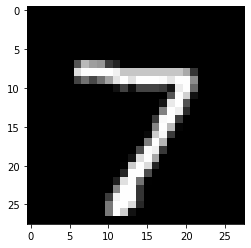

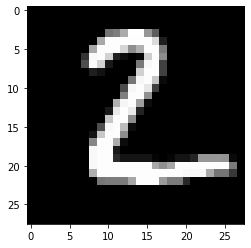

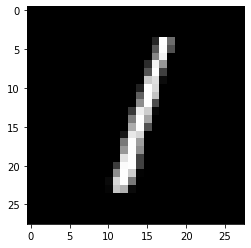

In [37]:
# Plot the test images used in the previous cell
plt.imshow(test_data[0][0].squeeze(), cmap = "gray")  # draws the test_data image in index 0, removes input of size 1 in the tensor, and display the image in grayscale format
plt.show()  # shows the image in console
plt.imshow(test_data[1][0].squeeze(), cmap = "gray")  # draws the test_data image in index 1, removes input of size 1 in the tensor, and display the image in grayscale format
plt.show()  # shows the image in console
plt.imshow(test_data[2][0].squeeze(), cmap = "gray")  # draws the test_data image in index 2, removes input of size 1 in the tensor, and display the image in grayscale format
plt.show()  # shows the image in console

#try more visualization here


In [ ]:
# May include more testing and visualization here (optional)

